# This code generates Kentucky's network (edges and nodes) from OpenStreet Map

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
import osmnx as ox

# Increase max query area size
ox.settings.max_query_area_size = 110_000_000_000  

# Generate Kentucky Network

In [3]:
# Generate Kentucky Network
import osmnx as ox
%matplotlib inline
road_types = '["highway"~"motorway|trunk|primary|secondary"]'
G = ox.graph_from_place('Kentucky, United States', network_type = 'drive', custom_filter=road_types)


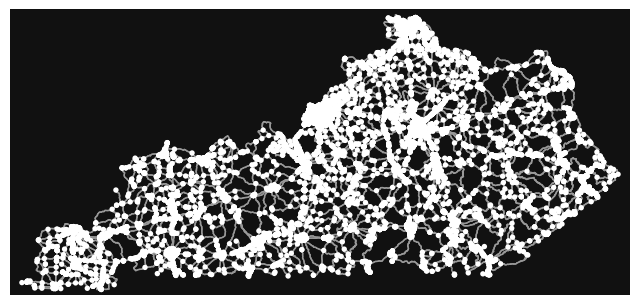

In [4]:
fig, ax = ox.plot_graph(ox.project_graph(G))

In [5]:
# convert MultiDiGraph to an undirected MultiGraph
M = ox.convert.to_undirected(G)

In [6]:
# convert MultiDiGraph to a DiGraph without parallel edges
D = ox.convert.to_digraph(G)

In [7]:
# Convert graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [8]:
gdf_nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
53726295,36.500498,-88.326025,3,NaN,NaN,POINT (-88.32603 36.50050)
161654014,36.988818,-88.952658,4,NaN,NaN,POINT (-88.95266 36.98882)
161654295,37.005113,-88.861911,3,NaN,NaN,POINT (-88.86191 37.00511)
161654312,37.005185,-88.852288,3,NaN,NaN,POINT (-88.85229 37.00518)
161656958,36.968693,-89.088654,3,NaN,NaN,POINT (-89.08865 36.96869)


In [13]:
gdf_edges.head()

osmid  \
u         v         key                                               
53726295  162620662 0    [16122080, 108852649, 108852550, 16123336]   
          162616256 0                                      16122865   
161654014 161707908 0                          [16079888, 16081016]   
          161718371 0                                      16081447   
          161654295 0                                     373362864   

                                      ref  \
u         v         key                     
53726295  162620662 0    [KY 893, KY 783]   
          162616256 0       US 641;KY 893   
161654014 161707908 0              KY 802   
          161718371 0              KY 802   
          161654295 0              KY 286   

                                                                      name  \
u         v         key                                                      
53726295  162620662 0    [Stateline Road West, Crossland Road, State St...   
          162616256 0                                          Main Street   
161654014 161707908 0                    [Blandville Road, La Center Road]   
          161718371 0                                        New York Road   
          161654295 0                                       Wickliffe Road   

                           highway  oneway       reversed     length  \
u         v         key                                                
53726295  162620662 0    secondary   False  [False, True]  10427.517   
          162616256 0        trunk   False          False     92.744   
161654014 161707908 0    secondary   False  [False, True]  12059.357   
          161718371 0    secondary   False           True   5803.317   
          161654295 0    secondary   False          False   8700.246   

                                                                  geometry  \
u         v         key                                                      
53726295  162620662 0    LINESTRING (-88.32603 36.50050, -88.32711 36.5...   
          162616256 0    LINESTRING (-88.32603 36.50050, -88.32597 36.5...   
161654014 161707908 0    LINESTRING (-88.95266 36.98882, -88.95266 36.9...   
          161718371 0    LINESTRING (-88.95266 36.98882, -88.95266 36.9...   
          161654295 0    LINESTRING (-88.95266 36.98882, -88.95202 36.9...   

                        lanes maxspeed bridge junction tunnel access width  \
u         v         key                                                      
53726295  162620662 0     NaN      NaN    NaN      NaN    NaN    NaN   NaN   
          162616256 0       2      NaN    NaN      NaN    NaN    NaN   NaN   
161654014 161707908 0     NaN      NaN    NaN      NaN    NaN    NaN   NaN   
          161718371 0     NaN      NaN    NaN      NaN    NaN    NaN   NaN   
          161654295 0       2   55 mph    NaN      NaN    NaN    NaN   NaN   

                        area  
u         v         key       
53726295  162620662 0    NaN  
          162616256 0    NaN  
161654014 161707908 0    NaN  
          161718371 0    NaN  
          161654295 0    NaN

In [14]:
# Fill NaN values in 'Maxspeed' with 0
gdf_edges['maxspeed'] = gdf_edges['maxspeed'].fillna('0')

In [15]:
# List out the Max Speed
maxspeed_var= gdf_edges['maxspeed'].tolist()
maxspeed_var

['0',
 '0',
 '0',
 '0',
 '55 mph',
 ['35 mph', '55 mph'],
 '55 mph',
 '0',
 '55 mph',
 '55 mph',
 '0',
 '55 mph',
 '0',
 '25 mph',
 '55 mph',
 '0',
 '0',
 ['35 mph', '55 mph'],
 '0',
 '0',
 '25 mph',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '70 mph',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '70 mph',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [16]:
# Print the unique data type
print(gdf_edges['maxspeed'].apply(type).unique())

[<class 'str'> <class 'list'>]


In [17]:
import re

# Helper function to clean and convert 'Maxspeed' values to integers
def convert_to_int(value):
    if isinstance(value, int):
        return value  # If it's already an integer, return it as is
    elif isinstance(value, str):
        # Remove any non-numeric characters from string and try to convert to int
        value = re.sub(r'\D', '', value)
        return int(value) if value else 0
    elif isinstance(value, list) and len(value) > 0:
        # If it's a list, try to convert the first element to an integer
        try:
            return int(value[0])
        except (ValueError, TypeError):
            return 0  # If it fails, return 0
    else:
        return 0  # For any other cases (e.g., empty list, None), return 0

# Apply the function to 'Maxspeed' column and convert it to integers
gdf_edges['maxspeed'] = gdf_edges['maxspeed'].apply(convert_to_int)

In [18]:
maxspeed_var= gdf_edges['maxspeed'].tolist()
maxspeed_var

[0,
 0,
 0,
 0,
 55,
 0,
 55,
 0,
 55,
 55,
 0,
 55,
 0,
 25,
 55,
 0,
 0,
 0,
 0,
 0,
 25,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 70,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 70,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 35,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 55,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 55,
 55,
 0,
 0,
 0,
 0,
 0

In [19]:
print(gdf_edges['maxspeed'].apply(type).unique())

[<class 'int'>]


In [20]:
highway_maxspeed = gdf_edges[['highway', 'maxspeed']]
highway_maxspeed.head(20)

highway  maxspeed
u         v         key                     
53726295  162620662 0    secondary         0
          162616256 0        trunk         0
161654014 161707908 0    secondary         0
          161718371 0    secondary         0
          161654295 0    secondary        55
          161684907 0    secondary         0
161654295 161654312 0    secondary        55
          166262975 0    secondary         0
          161654014 0    secondary        55
161654312 161654295 0    secondary        55
          161666993 0    secondary         0
          166366581 0    secondary        55
161656958 161707908 0        trunk         0
          161684937 0        trunk        25
161666993 166366566 0      primary        55
          161711344 0      primary         0
          161654312 0    secondary         0
161684907 161654014 0    secondary         0
          161714437 0      primary         0
          161684937 0      primary         0

In [21]:
highway_types = gdf_edges['highway'].tolist()
highway_types

['secondary',
 'trunk',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'trunk',
 'trunk',
 'primary',
 'primary',
 'secondary',
 'secondary',
 'primary',
 'primary',
 'trunk',
 'trunk',
 'primary',
 'trunk',
 'secondary',
 'trunk',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'primary',
 'primary',
 'primary',
 'secondary',
 'primary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'motorway_link',
 'motorway_link',
 'primary',
 'primary',
 'secondary',
 'secondary',
 'secondary',
 'primary',
 'primary',
 'motorway_link',
 'motorway_link',
 'motorway_link',
 'primary',
 'motorway_link',
 'primary',
 'motorway_link',
 'motorway',
 'motorway_link',
 'motorway_link',
 'motorway_link',
 'secondary',
 'secondary',
 'motorway_link',
 'motorway_link',
 'm

In [22]:
print(gdf_edges['highway'].dtype)

object


In [23]:
print(gdf_edges['highway'].apply(type).unique())

[<class 'str'> <class 'list'>]


In [24]:
# Convert lists to tuples, leaving strings as they are
gdf_edges['highway'] = gdf_edges['highway'].apply(lambda x: tuple(x) if isinstance(x, list) else x)

# Check for unique values
unique_items = gdf_edges['highway'].unique()
print(unique_items)

['secondary' 'trunk' 'primary' 'motorway_link' 'motorway' 'secondary_link'
 'primary_link' 'trunk_link' ('motorway_link', 'motorway')
 ('primary', 'trunk') ('trunk', 'motorway_link', 'motorway')
 ('primary', 'secondary') ('motorway_link', 'secondary')
 ('primary', 'trunk_link') ('secondary_link', 'secondary')
 ('primary', 'motorway_link') ('secondary_link', 'motorway_link')
 ('trunk', 'motorway') ('primary', 'primary_link') ('trunk', 'trunk_link')
 ('trunk_link', 'secondary')]


In [25]:
# Function to clean the 'highway' column
def clean_highway_column(value):
    if isinstance(value, tuple):
        return str(value[0])  # Pick the first value of the tuple and convert to string
    return value  # If it's already a string, return it as is

# Apply the function to the 'highway' column
gdf_edges['highway'] = gdf_edges['highway'].apply(clean_highway_column)

# Display the updated DataFrame
print(gdf_edges.head(10))

                                                                     osmid  \
u         v         key                                                      
53726295  162620662 0           [16122080, 108852649, 108852550, 16123336]   
          162616256 0                                             16122865   
161654014 161707908 0                                 [16079888, 16081016]   
          161718371 0                                             16081447   
          161654295 0                                            373362864   
          161684907 0    [16080446, 373362864, 373362866, 16080600, 113...   
161654295 161654312 0                                            373362864   
          166262975 0                       [16081121, 16080542, 16288079]   
          161654014 0                                            373362864   
161654312 161654295 0                                            373362864   

                                      ref  \
u         v       

In [26]:
unique_items = gdf_edges['highway'].unique()
print(unique_items)

['secondary' 'trunk' 'primary' 'motorway_link' 'motorway' 'secondary_link'
 'primary_link' 'trunk_link']


In [27]:
# Add a new column with 80% of the values from 'Maxspeed'
gdf_edges['travelspeed'] = gdf_edges['maxspeed'] * 0.8

In [28]:
# View the updated GeoDataFrame
highway_maxspeed_trav = gdf_edges[['highway', 'maxspeed','travelspeed']]
highway_maxspeed_trav.head(20)

highway  maxspeed  travelspeed
u         v         key                                  
53726295  162620662 0    secondary         0          0.0
          162616256 0        trunk         0          0.0
161654014 161707908 0    secondary         0          0.0
          161718371 0    secondary         0          0.0
          161654295 0    secondary        55         44.0
          161684907 0    secondary         0          0.0
161654295 161654312 0    secondary        55         44.0
          166262975 0    secondary         0          0.0
          161654014 0    secondary        55         44.0
161654312 161654295 0    secondary        55         44.0
          161666993 0    secondary         0          0.0
          166366581 0    secondary        55         44.0
161656958 161707908 0        trunk         0          0.0
          161684937 0        trunk        25         20.0
161666993 166366566 0      primary        55         44.0
          161711344 0      primary         0          0.0
          161654312 0    secondary         0          0.0
161684907 161654014 0    secondary         0          0.0
          161714437 0      primary         0          0.0
          161684937 0      primary         0          0.0

In [29]:
# Separate set of replacement values for each highway class
replacement_speeds = {
    'motorway': 56,
    'motorway_link': 28,
    'trunk': 53,
    'trunk_link': 25,
    'primary' : 40,
    'primary_link' : 19,
    'secondary' : 34,
    'secondary_link' : 16,
    'tertiary' : 25,
    'tertiary_link' : 12,
    'unclassified' : 16,
    'residential' : 16,
    'living_street' : 6,
    'service' : 9,
}

# Function to replace 0 travelspeed with predefined values for the respective highway class
def replace_zero_travelspeed(gdf_edges, replacement_speeds):
    gdf_edges['travelspeed'] = gdf_edges.apply(
        lambda row: replacement_speeds[row['highway']] if row['travelspeed'] == 0 else row['travelspeed'], axis=1)
    
    return gdf_edges

# Apply the function to replace zero travelspeed using the predefined values
gdf_edges = replace_zero_travelspeed(gdf_edges, replacement_speeds)

In [30]:
gdf_edges.head(10)

osmid  \
u         v         key                                                      
53726295  162620662 0           [16122080, 108852649, 108852550, 16123336]   
          162616256 0                                             16122865   
161654014 161707908 0                                 [16079888, 16081016]   
          161718371 0                                             16081447   
          161654295 0                                            373362864   
          161684907 0    [16080446, 373362864, 373362866, 16080600, 113...   
161654295 161654312 0                                            373362864   
          166262975 0                       [16081121, 16080542, 16288079]   
          161654014 0                                            373362864   
161654312 161654295 0                                            373362864   

                                      ref  \
u         v         key                     
53726295  162620662 0    [KY 893, KY 783]   
          162616256 0       US 641;KY 893   
161654014 161707908 0              KY 802   
          161718371 0              KY 802   
          161654295 0              KY 286   
          161684907 0              KY 286   
161654295 161654312 0              KY 286   
          166262975 0             KY 2532   
          161654014 0              KY 286   
161654312 161654295 0              KY 286   

                                                                      name  \
u         v         key                                                      
53726295  162620662 0    [Stateline Road West, Crossland Road, State St...   
          162616256 0                                          Main Street   
161654014 161707908 0                    [Blandville Road, La Center Road]   
          161718371 0                                        New York Road   
          161654295 0                                       Wickliffe Road   
          161684907 0                     [Phillips Drive, Wickliffe Road]   
161654295 161654312 0                                       Wickliffe Road   
          166262975 0         [County Line Road, Kevil-Lovelaceville Road]   
          161654014 0                                       Wickliffe Road   
161654312 161654295 0                                       Wickliffe Road   

                           highway  oneway       reversed     length  \
u         v         key                                                
53726295  162620662 0    secondary   False  [False, True]  10427.517   
          162616256 0        trunk   False          False     92.744   
161654014 161707908 0    secondary   False  [False, True]  12059.357   
          161718371 0    secondary   False           True   5803.317   
          161654295 0    secondary   False          False   8700.246   
          161684907 0    secondary   False  [False, True]  12242.937   
161654295 161654312 0    secondary   False          False    854.544   
          166262975 0    secondary   False          False   8658.494   
          161654014 0    secondary   False           True   8700.246   
161654312 161654295 0    secondary   False           True    854.544   

                                                                  geometry  \
u         v         key                                                      
53726295  162620662 0    LINESTRING (-88.32603 36.50050, -88.32711 36.5...   
          162616256 0    LINESTRING (-88.32603 36.50050, -88.32597 36.5...   
161654014 161707908 0    LINESTRING (-88.95266 36.98882, -88.95266 36.9...   
          161718371 0    LINESTRING (-88.95266 36.98882, -88.95266 36.9...   
          161654295 0    LINESTRING (-88.95266 36.98882, -88.95202 36.9...   
          161684907 0    LINESTRING (-88.95266 36.98882, -88.95384 36.9...   
161654295 161654312 0    LINESTRING (-88.86191 37.00511, -88.85229 37.0...   
          166262975 0    LINESTRING (-88.86191 37.00511, -88.86191 37.0...   
         

In [33]:
# Convert travelspeed (in mph) to m/s
gdf_edges['speed_mps'] = gdf_edges['travelspeed'] * 0.44704

# Calculate travel time in seconds, then convert to minutes
gdf_edges['travel_time'] = (gdf_edges['length'] / gdf_edges['speed_mps'])

In [35]:
# check out some relevant columns
highway_tt= gdf_edges[['highway', 'maxspeed','travelspeed','travel_time', 'length', 'speed_mps']]
highway_tt.head(10)

highway  maxspeed  travelspeed  travel_time  \
u         v         key                                                  
53726295  162620662 0    secondary         0         34.0   686.049742   
          162616256 0        trunk         0         53.0     3.914385   
161654014 161707908 0    secondary         0         34.0   793.412157   
          161718371 0    secondary         0         34.0   381.813247   
          161654295 0    secondary        55         44.0   442.315819   
          161684907 0    secondary         0         34.0   805.490297   
161654295 161654312 0    secondary        55         44.0    43.444557   
          166262975 0    secondary         0         34.0   569.661749   
          161654014 0    secondary        55         44.0   442.315819   
161654312 161654295 0    secondary        55         44.0    43.444557   

                            length  speed_mps  
u         v         key                        
53726295  162620662 0    10427.517   15.19936  
          162616256 0       92.744   23.69312  
161654014 161707908 0    12059.357   15.19936  
          161718371 0     5803.317   15.19936  
          161654295 0     8700.246   19.66976  
          161684907 0    12242.937   15.19936  
161654295 161654312 0      854.544   19.66976  
          166262975 0     8658.494   15.19936  
          161654014 0     8700.246   19.66976  
161654312 161654295 0      854.544   19.66976

In [38]:
# View the updated GeoDataFrame with the new 'travel_time' column
gdf_edges.head()

osmid  \
u         v         key                                               
53726295  162620662 0    [16122080, 108852649, 108852550, 16123336]   
          162616256 0                                      16122865   
161654014 161707908 0                          [16079888, 16081016]   
          161718371 0                                      16081447   
          161654295 0                                     373362864   

                                      ref  \
u         v         key                     
53726295  162620662 0    [KY 893, KY 783]   
          162616256 0       US 641;KY 893   
161654014 161707908 0              KY 802   
          161718371 0              KY 802   
          161654295 0              KY 286   

                                                                      name  \
u         v         key                                                      
53726295  162620662 0    [Stateline Road West, Crossland Road, State St...   
          162616256 0                                          Main Street   
161654014 161707908 0                    [Blandville Road, La Center Road]   
          161718371 0                                        New York Road   
          161654295 0                                       Wickliffe Road   

                           highway  oneway       reversed     length  \
u         v         key                                                
53726295  162620662 0    secondary   False  [False, True]  10427.517   
          162616256 0        trunk   False          False     92.744   
161654014 161707908 0    secondary   False  [False, True]  12059.357   
          161718371 0    secondary   False           True   5803.317   
          161654295 0    secondary   False          False   8700.246   

                                                                  geometry  \
u         v         key                                                      
53726295  162620662 0    LINESTRING (-88.32603 36.50050, -88.32711 36.5...   
          162616256 0    LINESTRING (-88.32603 36.50050, -88.32597 36.5...   
161654014 161707908 0    LINESTRING (-88.95266 36.98882, -88.95266 36.9...   
          161718371 0    LINESTRING (-88.95266 36.98882, -88.95266 36.9...   
          161654295 0    LINESTRING (-88.95266 36.98882, -88.95202 36.9...   

                        lanes  maxspeed bridge junction tunnel access width  \
u         v         key                                                       
53726295  162620662 0     NaN         0    NaN      NaN    NaN    NaN   NaN   
          162616256 0       2         0    NaN      NaN    NaN    NaN   NaN   
161654014 161707908 0     NaN         0    NaN      NaN    NaN    NaN   NaN   
          161718371 0     NaN         0    NaN      NaN    NaN    NaN   NaN   
          161654295 0       2        55    NaN      NaN    NaN    NaN   NaN   

                        area  travelspeed  speed_mps  travel_time  
u         v         key                                            
53726295  162620662 0    NaN         34.0   15.19936   686.049742  
          162616256 0    NaN         53.0   23.69312     3.914385  
161654014 161707908 0    NaN         34.0   15.19936   793.412157  
          161718371 0    NaN         34.0   15.19936   381.813247  
          161654295 0    NaN         44.0   19.66976   442.315819

In [39]:
gdf_nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
53726295,36.500498,-88.326025,3,NaN,NaN,POINT (-88.32603 36.50050)
161654014,36.988818,-88.952658,4,NaN,NaN,POINT (-88.95266 36.98882)
161654295,37.005113,-88.861911,3,NaN,NaN,POINT (-88.86191 37.00511)
161654312,37.005185,-88.852288,3,NaN,NaN,POINT (-88.85229 37.00518)
161656958,36.968693,-89.088654,3,NaN,NaN,POINT (-89.08865 36.96869)


In [40]:
gdf_edges.isna().any()

osmid          False
ref             True
name            True
highway        False
oneway         False
reversed       False
length         False
geometry       False
lanes           True
maxspeed       False
bridge          True
junction        True
tunnel          True
access          True
width           True
area            True
travelspeed    False
speed_mps      False
travel_time    False
dtype: bool

In [43]:
# Save edge as csv
gdf_edges.to_csv('ky_edges_new.csv', index=True)

In [31]:
# Save edge as csv
gdf_edges.to_csv('ky_edges.csv', index=True)

In [32]:
# Save nodes as csv

# Import necessary module to convert geometries to WKT
from shapely.geometry import Point

# Function to safely convert geometries to WKT
def to_wkt(geom):
    if isinstance(geom, Point):  # If it's a geometry object, convert to WKT
        return geom.wkt
    elif isinstance(geom, str):  # If it's already a string, return it as is
        return geom
    else:
        return None  # Handle cases where geometry is None or invalid

# Apply the function to convert geometries to WKT
gdf_nodes['geometry'] = gdf_nodes['geometry'].apply(to_wkt)

# Export the GeoDataFrame to CSV with geometry in WKT format
gdf_nodes.to_csv('Ky_nodes.csv', index=True)

C:\Users\Musa\AppData\Local\Temp\ipykernel_29224\3517525048.py:16: UserWarning: Geometry column does not contain geometry.
  gdf_nodes['geometry'] = gdf_nodes['geometry'].apply(to_wkt)
